In [34]:
import keras
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Add, Input, Multiply, Concatenate, GlobalAveragePooling2D
#from keras.applications.vgg16 import VGG16
from keras.applications.mobilenetv2 import MobileNetV2
import os, glob, random
from PIL import Image
import pickle
import numpy as np
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.logging.set_verbosity(tf.logging.ERROR)

In [35]:
batch_size = 11
num_classes = 2
#epochs = 50
epochs = 15
#data_augmentation = False
#num_predictions = 20
#save_dir = os.path.join(os.getcwd(), 'saved_models')
model_path = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/mbnv2_model_5.h5'

img_width = 128
img_height = 128

train_dir = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Train/'
validation_dir = 'C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Validation/'

class_label = ['OK', 'NG']

In [36]:
#input_tensorの定義
input_tensor = Input(shape=(img_width, img_height, 3))
#Create the base model from the pre-trained convnets
model = MobileNetV2(include_top=False, weights='imagenet', input_tensor=input_tensor)

#model.summary()

top_model = Sequential()
#top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(GlobalAveragePooling2D())  #Global Average Pooling 層の良いポイント,パラメーター数を非常に少なくすることができる→　モデルが単純になり、過学習をしにくくなる
top_model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
top_model.add(BatchNormalization())
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# mobilenetv2とtop_modelを連結
model = Model(inputs=model.input, outputs=top_model(model.output))

'''
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
#model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#model.add(Activation('sigmoid'))
'''

C:\Users\Hira\Anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


"\nmodel = Sequential()\nmodel.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(32, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\n\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu', padding='same'))\n#model.add(Activation('relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(512, activation='relu'))\n#model.add(Activation('relu'))\nmodel.add(Dropout(0.5))\nmodel.add(De

In [37]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu

In [38]:
from keras.callbacks import ModelCheckpoint

#img_width, img_height = 128, 128
nb_train_samples = 2670 
nb_validation_samples = 334 
epochs = 350
batch_size = 11
nb_category = 2

callbacks = list()
callbacks.append(ModelCheckpoint(filepath="C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/mbnv2_model_5.h5"))
'''
model.trainable= True

set_trainable = False
for layer in model.layers:
    if layer.name == 'block5_conv1':
        set_trainable == True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
'''
'''
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.0002),
                  metrics=['accuracy'])

'''
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.RMSprop(lr=0.0001),
                  metrics=['accuracy'])

'''
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
'''

check_point = keras.callbacks.ModelCheckpoint(
        filepath = os.path.join('mbnv2_model{epoch:02d}-vacc{val_acc:.2f}.hdf5'), 
        monitor='val_acc', verbose=0, save_best_only=True, mode='max')
    

train_datagen=ImageDataGenerator(
    rescale=1./255,
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=25,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=10,
        #callbacks=[check_point]
        callbacks=callbacks
)

'''
history=model.fit_generator(train_generator,
                         steps_per_epoch=nb_train_samples // batch_size,
                         epochs=epochs,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=nb_validation_samples // batch_size,
                         #callbacks=[CSVLogger(file_name+'.csv')],
                         callbacks=callbacks
                        )
'''
model.save(model_path)
print('\nSaved trained model at --> %s ' % model_path)

Found 2670 images belonging to 2 classes.
Found 334 images belonging to 2 classes.
Epoch 1/350
25/25 [==============================] - 44s 2s/step - loss: 0.8495 - acc: 0.6182 - val_loss: 0.3549 - val_acc: 0.8091
Epoch 2/350
25/25 [==============================] - 21s 841ms/step - loss: 0.4299 - acc: 0.8073 - val_loss: 0.1857 - val_acc: 0.9000
Epoch 3/350
25/25 [==============================] - 26s 1s/step - loss: 0.3667 - acc: 0.8582 - val_loss: 0.1566 - val_acc: 0.9364
Epoch 4/350
25/25 [==============================] - 30s 1s/step - loss: 0.2898 - acc: 0.8655 - val_loss: 0.1224 - val_acc: 0.9612
Epoch 5/350
25/25 [==============================] - 30s 1s/step - loss: 0.2771 - acc: 0.9018 - val_loss: 0.0330 - val_acc: 1.0000
Epoch 6/350
25/25 [==============================] - 29s 1s/step - loss: 0.2156 - acc: 0.9236 - val_loss: 0.1267 - val_acc: 0.9273
Epoch 7/350
25/25 [==============================] - 29s 1s/step - loss: 0.1426 - acc: 0.9382 - val_loss: 0.0981 - val_acc: 0.95

25/25 [==============================] - 30s 1s/step - loss: 0.0084 - acc: 1.0000 - val_loss: 4.9048e-04 - val_acc: 1.0000
Epoch 63/350
25/25 [==============================] - 31s 1s/step - loss: 0.0085 - acc: 1.0000 - val_loss: 1.3808e-04 - val_acc: 1.0000
Epoch 64/350
25/25 [==============================] - 30s 1s/step - loss: 0.1220 - acc: 0.9782 - val_loss: 4.5562e-05 - val_acc: 1.0000
Epoch 65/350
25/25 [==============================] - 31s 1s/step - loss: 0.0064 - acc: 1.0000 - val_loss: 2.0589e-04 - val_acc: 1.0000
Epoch 66/350
25/25 [==============================] - 31s 1s/step - loss: 0.0047 - acc: 1.0000 - val_loss: 6.5973e-05 - val_acc: 1.0000
Epoch 67/350
25/25 [==============================] - 30s 1s/step - loss: 0.0023 - acc: 1.0000 - val_loss: 1.7829e-04 - val_acc: 1.0000
Epoch 68/350
25/25 [==============================] - 31s 1s/step - loss: 0.1388 - acc: 0.9782 - val_loss: 2.0433e-04 - val_acc: 1.0000
Epoch 69/350
25/25 [==============================] - 31s 1s/

25/25 [==============================] - 20s 785ms/step - loss: 0.0038 - acc: 1.0000 - val_loss: 6.3390e-05 - val_acc: 1.0000
Epoch 182/350
25/25 [==============================] - 19s 776ms/step - loss: 0.0232 - acc: 0.9927 - val_loss: 6.2119e-05 - val_acc: 1.0000
Epoch 183/350
25/25 [==============================] - 19s 770ms/step - loss: 0.1354 - acc: 0.9782 - val_loss: 2.4120e-04 - val_acc: 1.0000
Epoch 184/350
25/25 [==============================] - 19s 778ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 5.8145e-04 - val_acc: 1.0000
Epoch 185/350
25/25 [==============================] - 19s 768ms/step - loss: 6.7188e-04 - acc: 1.0000 - val_loss: 5.4935e-04 - val_acc: 1.0000
Epoch 186/350
25/25 [==============================] - 19s 774ms/step - loss: 4.4883e-04 - acc: 1.0000 - val_loss: 1.5284e-04 - val_acc: 1.0000
Epoch 187/350
25/25 [==============================] - 19s 775ms/step - loss: 8.0393e-04 - acc: 1.0000 - val_loss: 5.2004e-05 - val_acc: 1.0000
Epoch 188/350
25/25 [=

Epoch 239/350
25/25 [==============================] - 19s 760ms/step - loss: 1.8641e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 240/350
25/25 [==============================] - 19s 766ms/step - loss: 4.1244e-04 - acc: 1.0000 - val_loss: 2.3356e-05 - val_acc: 1.0000
Epoch 241/350
25/25 [==============================] - 19s 771ms/step - loss: 1.8048e-04 - acc: 1.0000 - val_loss: 2.8856e-04 - val_acc: 1.0000
Epoch 242/350
25/25 [==============================] - 19s 768ms/step - loss: 2.2960e-04 - acc: 1.0000 - val_loss: 2.1576e-05 - val_acc: 1.0000
Epoch 243/350
25/25 [==============================] - 19s 760ms/step - loss: 6.5129e-04 - acc: 1.0000 - val_loss: 1.1960e-05 - val_acc: 1.0000
Epoch 244/350
25/25 [==============================] - 19s 761ms/step - loss: 8.9714e-04 - acc: 1.0000 - val_loss: 1.3204e-05 - val_acc: 1.0000
Epoch 245/350
25/25 [==============================] - 19s 762ms/step - loss: 5.4862e-04 - acc: 1.0000 - val_loss: 8.6614e-06 - val_acc: 1.0

In [39]:
from keras.optimizers import SGD,Adam
#for test
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img

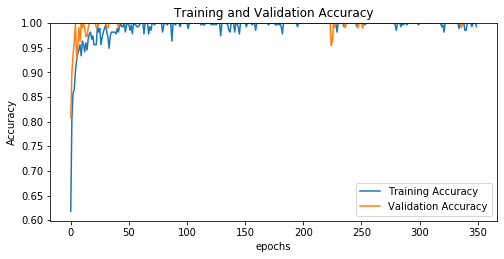

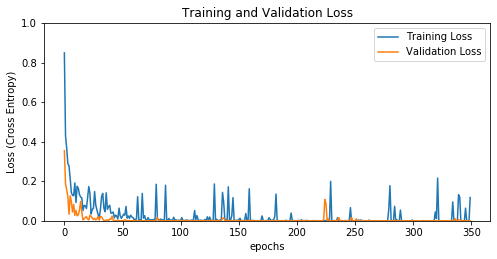

In [40]:
"""
history = model.fit_generator(train_generator,
                    steps_per_epoch=25,
                    epochs=4,validation_data=validation_generator,
                    validation_steps=10,verbose=1) 

Learning curves
Let's take a look at the learning curves of the training and 
validation accuracy/loss when using the MobileNet V2 base model as a fixed feature extractor.
https://www.tensorflow.org/tutorials/images/transfer_learning
"""
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epochs')
plt.show()

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss (Cross Entropy)')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epochs')
plt.show()

In [41]:
from keras.optimizers import SGD,Adam
#for test
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img

print("Wainting...")
#img_width, img_height = 128,128
nb_test_samples = 334
#batch_size = 1
nb_category = 2

batch_size=11
#file_name='vgg16_been_224'
test_dir='C:/Users/Hira/Desktop/Coffee Bean Size_05032020/32_32/Coffee_2019/Test/'
#display_dir='/home/reeen/Documents/keras/cnn3display'
label=['OK','NG']

print("Wainting...")

#load model and weights
#json_string=open(file_name+'.json').read()
#model=model_from_json(json_string)
model.load_weights(model_path)
#model.load_weights('/home/reeen/Documents/keras/cnn5/models/vgg16_weight_epoch978.h5')

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''
#data generate
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary',
    #shuffle=True
)

#evaluate model
score=model.evaluate_generator(
    test_generator,
    steps=nb_test_samples,
     verbose=1)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

Wainting...
Wainting...
Found 334 images belonging to 2 classes.
334/334 [==============================] - 92s 275ms/step

 test loss: 2.1564088354500616e-07

 test_acc: 1.0
